In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
with open('../../spbu-ai-fundamentals/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

В этой теме мы поработаем с данными, посвященными определению рака молочной железы на основе различных признаков анализа клеток в биопсии (радиус, кривизна, симметрия). Известно, что этот датасет линейно разделим.

In [10]:
df = pd.read_csv(r'C:\Users\2005k\PycharmProjects\spbu-ai-fundamentals1\classification\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Задание**: Проведите краткий EDA. Есть ли выбросы в данных, какие столбцы коррелируют больше всего, стоит ли преобразоывавть какие-то признаки? Хватит 3-4 графиков или таблиц (но можно больше).

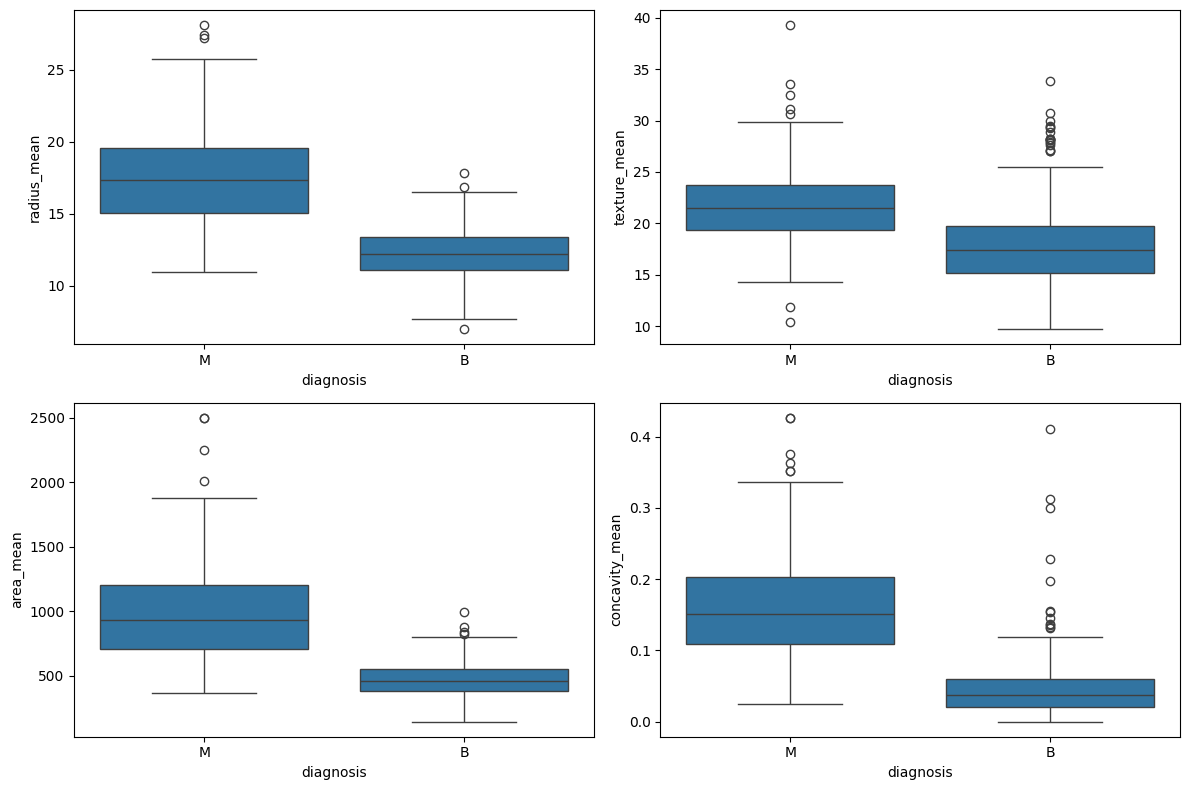

In [13]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(data=df, y='radius_mean', x='diagnosis', ax=axes[0,0])
sns.boxplot(data=df, y='texture_mean', x='diagnosis', ax=axes[0,1])
sns.boxplot(data=df, y='area_mean', x='diagnosis', ax=axes[1,0])
sns.boxplot(data=df, y='concavity_mean', x='diagnosis', ax=axes[1,1])
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix of Top Features')

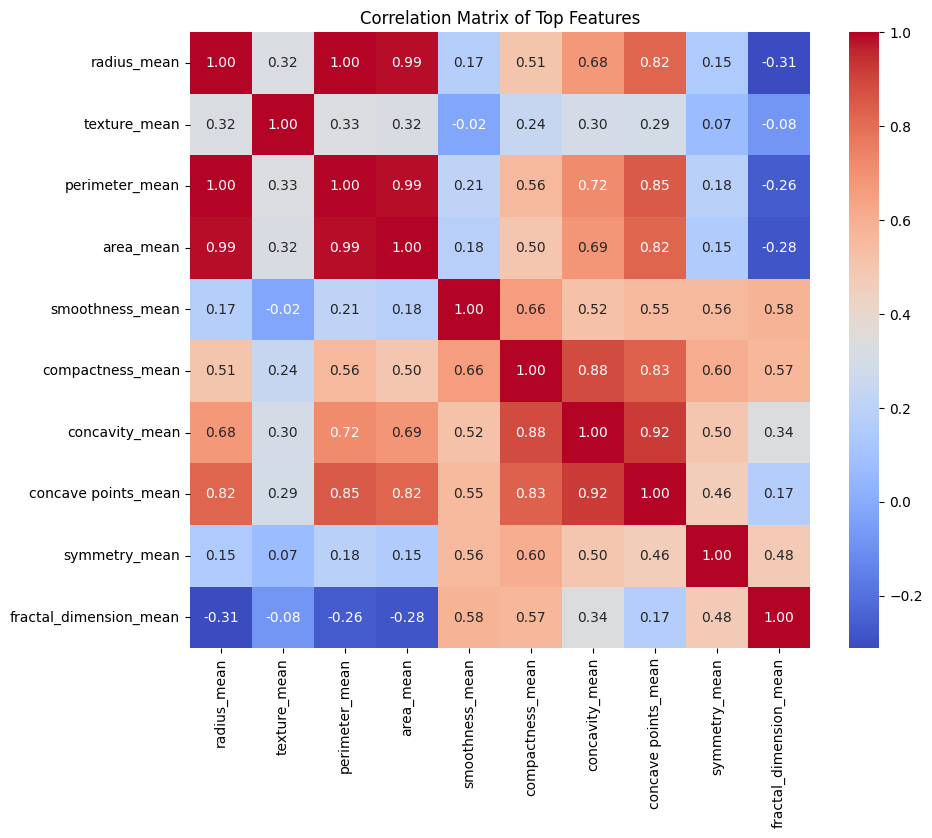

In [14]:
top_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
               'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Top Features')

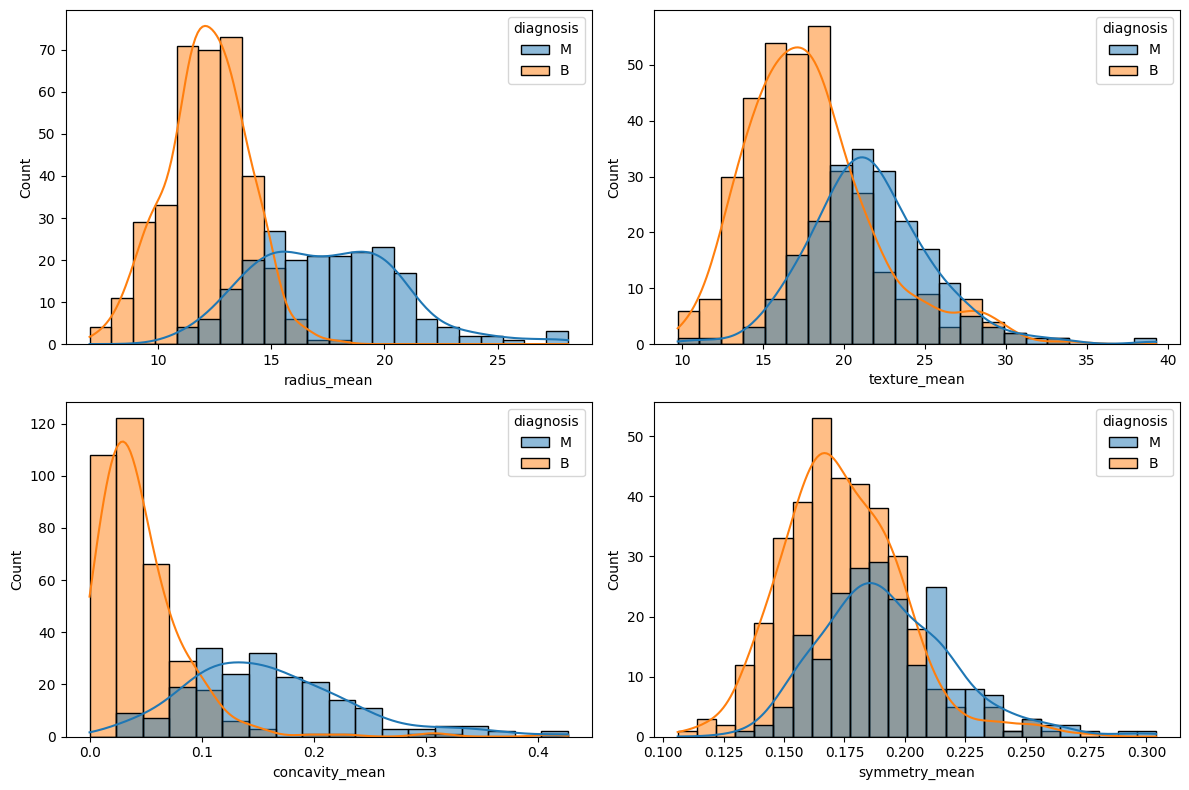

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='texture_mean', hue='diagnosis', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='concavity_mean', hue='diagnosis', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='symmetry_mean', hue='diagnosis', kde=True, ax=axes[1,1])
plt.tight_layout()

In [16]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Задание**: выведите, сколько в датасете примеров позитивного и негативного класса.

In [18]:
df['diagnosis'].value_counts()
# 357 доброкачественных и 212 злокачественных случаев

diagnosis
0    357
1    212
Name: count, dtype: int64

In [19]:
target = 'diagnosis'
features = list(df.columns)
features.remove('diagnosis')
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [20]:
X = df[features]
y = df[[target]]

Попробуем обучить логистическую регрессию на этих данных. Обратите внимание, что по умолчанию применяется L2 регуляризация,мы будем строить предсказания без нее. Однако, в качестве упражнения, сравним результаты с масштабированием признаков и без.

**Задание**: оцените, насколько сбалансированы признаки по масштабу. Попробуйте ответить до запуска кода, стоит ли их сначала масштабировать и почему. 

In [21]:
# Да, следует, из таблицы очевидно почему
df[['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']].describe().loc[['min', 'max']]

,radius_mean,texture_mean,area_mean,concavity_mean
min,6.981,9.71,143.5,0.0000
max,28.110,39.28,2501.0,0.4268


Без масштабирования:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\2005k\miniconda3\envs\spbu-ai-fundamentals1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9210526315789473

С масштабированием:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9385964912280702

Все классификаторы в Sklearn имеют два режима - предсказание лейблов и вероятностей. Предсказание вероятностей дает нам необработанные оценки принадлежности к тому или иному классу. Модель в таком случае возвращает вектор (для каждого семпла) размера N (где N - число классов). 

**Вопрос**: Какого размера будет предсказание в случае бинарной логистической регрессии? А многоклассовой? Другими словами, в каких случаях негативный класс добавляется как отдельный?

массив формы (n_samples, 2)
массив формы (n_samples, n_classes)
Негативный класс добавляется отдельно:
1. Всегда для бинарной классификации
2. Никогда для многоклассовой (там все классы равноправны)

In [24]:
df_results = pd.DataFrame({
    'pred': clf.predict(X_test).reshape(-1),
    'pred_proba': clf.predict_proba(X_test)[:, 1],
    'true': y_test.reshape(-1),
})

**Задание**: Постройте матрицу предсказаний 100x2 для регрессии с двумя классами, где в каждой строке будут случайные значения. 
1) Получите из этого оценку принадлежности к классу с помощью сигмоиды и софтмакса. 
2) Постройте предсказание класса. В случае сигмоиды предсказывайте принадлежность к классу на основе границы, софтмакса - по максимальной вероятности

**Вопрос***: как еще можно предсказать класс? Всегда ли нужно брать именно эти функции?

In [28]:
np.random.seed(42)
raw_predictions = np.random.randn(100, 2) 

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


sigmoid_probs = sigmoid(raw_predictions[:, 1] - raw_predictions[:, 0])
sigmoid_result = np.column_stack([1-sigmoid_probs, sigmoid_probs])

In [30]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

softmax_result = softmax(raw_predictions)

In [33]:
sigmoid_classes = (sigmoid_probs > 0.5).astype(int)
softmax_classes = np.argmax(softmax_result, axis=1)
print(sigmoid_classes)
print('-------------')
print(softmax_classes)

[0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0]
-------------
[0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0]


In [34]:
df_results.head(20)

,pred,pred_proba,true
0,0,0.000000e+00,0
1,1,1.000000e+00,1
2,0,5.004255e-172,0
3,0,0.000000e+00,0
4,1,1.000000e+00,1
5,0,1.974881e-283,0
6,0,5.855374e-245,0
7,0,0.000000e+00,0
8,0,4.226793e-26,0
9,0,9.419755e-21,1


# Метрики классификации


## Метрики на основе лейблов
Рассмотрим, какие у нас могут быть тезультаты классификации.

* TP (true positive) - правильно предсказали: рак есть, что модель и предсказала
* FP (false positive) - неправильно предсказали: рака нет,  а модель предсказала, что есть (1st order error)
* FN (false negative) - неправильно предсказали: рак вообще-то есть,  а модель предсказала, что нет (2nd order error)!
* TN (true negative) - правильно предсказали: рака нет, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса. Она построена на предсказании вероятности. Площадь под ней (ROC-AUC) является неплохой оценкой общего качества предсказаний. 
 
Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем для сравнения случайный предикт. Иногда это не худшая стратегия. Если в данных мало сигнала, случайное предсказание может работать лучше ложного.

In [36]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [37]:
random_preds = random_classifier.predict(X_test)
random_preds

array([0, 1, 0, ..., 0, 1, 1])

Random Classifier metrics
AUC-PR: 0.5057
AUC-ROC: 0.5000


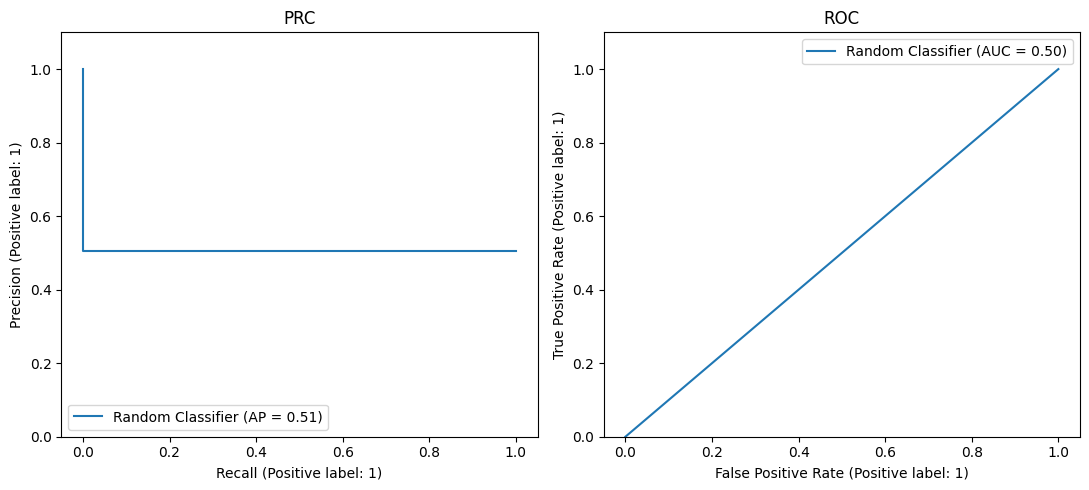

In [38]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

Также посчитаем другие метрики на основе лейблов.

**Задание:** Дополните код по рассчету метрик.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):

    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum((y_true == 0) * (y_pred == 1)) 
    fn = np.sum((y_true == 1) * (y_pred == 0))  
    tn = np.sum( (y_true == 0) * (y_pred == 0) )

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy 
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [40]:
# dataframe для сравнения
# методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)
# добавление очередной строки с характеристиками метода
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.518,0.482,0.523938,0.512195,0.518,0.505667,0.5,0.0


In [41]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7713333333333333

In [42]:
# dataframe для сравнения
# методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)
# добавление очередной строки с характеристиками метода
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Logistic Regression'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Logistic Regression,0.518,0.482,0.523938,0.512195,0.518,0.505667,0.5,0.0


Согласуются ли метрики? В чем может быть проблема accuracy?

**Задание**: Соберите табличку для разных классификаторов.

**Задание**: Постройте график PR-curve, ROC-curve для лучшего из них

In [44]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, params=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    metrics = {
        'acc': accuracy_score(y_test, y_pred),
        'er': 1 - accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_pr': average_precision_score(y_test, y_proba),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'params': params
    }
    
    if not hasattr(evaluate_model, 'best_model') or metrics['f1'] > evaluate_model.best_score:
        evaluate_model.best_model = model
        evaluate_model.best_proba = y_proba
        evaluate_model.best_score = metrics['f1']
        evaluate_model.best_name = model_name
    
    return metrics

                      acc        er  precision    recall        f1    auc_pr  \
LogReg(C=1)      0.771333  0.228667   0.775713  0.770600  0.773148  0.829382   
LogReg(C=10)     0.771333  0.228667   0.775713  0.770600  0.773148  0.829378   
LogReg(C=100)    0.771333  0.228667   0.775713  0.770600  0.773148  0.829382   
LogReg(C=0.1)    0.771000  0.229000   0.775199  0.770600  0.772893  0.829495   
LogReg(C=0.01)   0.770333  0.229667   0.774900  0.769281  0.772081  0.830506   
LogReg(C=0.001)  0.767000  0.233000   0.770145  0.768622  0.769383  0.830705   

                  roc_auc        C  
LogReg(C=1)      0.847872    1.000  
LogReg(C=10)     0.847874   10.000  
LogReg(C=100)    0.847876  100.000  
LogReg(C=0.1)    0.847836    0.100  
LogReg(C=0.01)   0.847327    0.010  
LogReg(C=0.001)  0.843254    0.001  


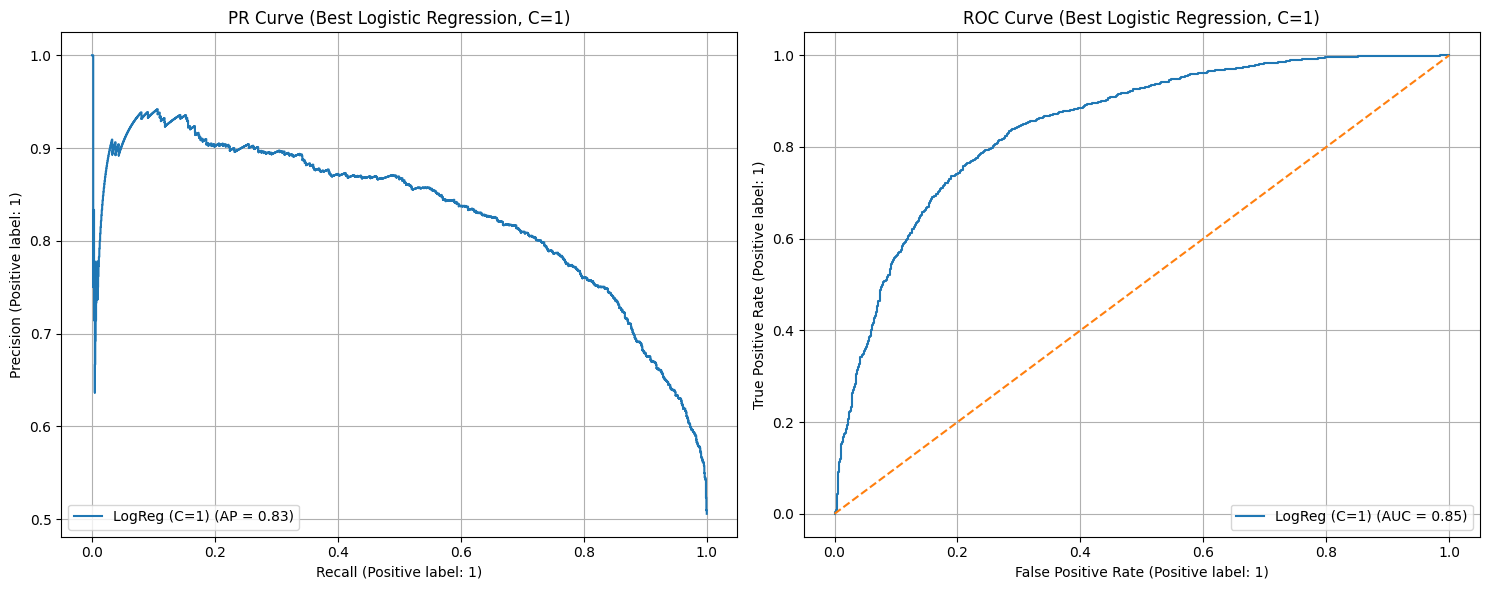

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            precision_recall_curve, average_precision_score,
                            roc_curve, roc_auc_score, PrecisionRecallDisplay,
                            RocCurveDisplay)
from sklearn.preprocessing import StandardScaler

df_metrics = pd.DataFrame(columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc', 'C'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    model = LogisticRegression(C=C, penalty='l2', solver='liblinear', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    metrics = {
        'acc': accuracy_score(y_test, y_pred),
        'er': 1 - accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc_pr': average_precision_score(y_test, y_proba),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'C': C
    }
    
    if not hasattr(evaluate_model, 'best_model') or metrics['f1'] > evaluate_model.best_score:
        evaluate_model.best_model = model
        evaluate_model.best_proba = y_proba
        evaluate_model.best_score = metrics['f1']
        evaluate_model.best_C = C
    
    df_metrics.loc[f'LogReg(C={C})'] = metrics

print(df_metrics.sort_values(by='f1', ascending=False))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PR-кривая
PrecisionRecallDisplay.from_estimator(
    evaluate_model.best_model, X_test_scaled, y_test, ax=ax1,
    name=f'LogReg (C={evaluate_model.best_C})'
)
ax1.set_title(f'PR Curve (Best Logistic Regression, C={evaluate_model.best_C})')
ax1.grid(True)

# ROC-кривая
RocCurveDisplay.from_estimator(
    evaluate_model.best_model, X_test_scaled, y_test, ax=ax2,
    name=f'LogReg (C={evaluate_model.best_C})'
)
ax2.plot([0, 1], [0, 1], linestyle='--', label='Random')
ax2.set_title(f'ROC Curve (Best Logistic Regression, C={evaluate_model.best_C})')
ax2.grid(True)

plt.tight_layout()
plt.show()

**Задание:** Постройте таблицу точности для набора данных wbdc. Сделайте по таблице метрик на обучающей и тестовой выборках. В таблице сравните разные преобразования признаков и гиперпараметры (регуляризацию). Можно сделать три-четыре эксперимента. 
- На каком эксперименте получилось достичь лучшего качества на трейне?
- А на тесте?
- Переобучается ли модель?

In [46]:
results = pd.DataFrame(columns=['Preprocessing', 'C', 'Train Accuracy', 
                            'Test Accuracy', 'Train F1', 'Test F1'])

# Эксперимент 1: Без масштабирования, C=1.0
lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
results.loc[0] = ['No Scaling', 1.0, 
                 accuracy_score(y_train, train_pred),
                 accuracy_score(y_test, test_pred),
                 f1_score(y_train, train_pred),
                 f1_score(y_test, test_pred)]

# Эксперимент 2: StandardScaler, C=1.0
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train_scaled, y_train)
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)
results.loc[1] = ['StandardScaler', 1.0, 
                 accuracy_score(y_train, train_pred),
                 accuracy_score(y_test, test_pred),
                 f1_score(y_train, train_pred),
                 f1_score(y_test, test_pred)]

# Эксперимент 3: StandardScaler, C=0.1 (сильная регуляризация)
lr = LogisticRegression(C=0.1, max_iter=1000)
lr.fit(X_train_scaled, y_train)
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)
results.loc[2] = ['StandardScaler', 0.1, 
                 accuracy_score(y_train, train_pred),
                 accuracy_score(y_test, test_pred),
                 f1_score(y_train, train_pred),
                 f1_score(y_test, test_pred)]

# Эксперимент 4: StandardScaler, C=10 (слабая регуляризация)
lr = LogisticRegression(C=10, max_iter=1000)
lr.fit(X_train_scaled, y_train)
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)
results.loc[3] = ['StandardScaler', 10, 
                 accuracy_score(y_train, train_pred),
                 accuracy_score(y_test, test_pred),
                 f1_score(y_train, train_pred),
                 f1_score(y_test, test_pred)]

print("Результаты экспериментов:")
print(results.sort_values(by='Test F1', ascending=False))

results['Overfitting Gap'] = results['Train Accuracy'] - results['Test Accuracy']
print("\nРазница в точности между train и test (признак переобучения):")
print(results[['Preprocessing', 'C', 'Overfitting Gap']])

Результаты экспериментов:
    Preprocessing     C  Train Accuracy  Test Accuracy  Train F1   Test F1
0      No Scaling   1.0        0.779429       0.771333  0.778670  0.773148
1  StandardScaler   1.0        0.779429       0.771333  0.778670  0.773148
3  StandardScaler  10.0        0.779429       0.771333  0.778670  0.773148
2  StandardScaler   0.1        0.779571       0.771000  0.778718  0.772893

Разница в точности между train и test (признак переобучения):
    Preprocessing     C  Overfitting Gap
0      No Scaling   1.0         0.008095
1  StandardScaler   1.0         0.008095
2  StandardScaler   0.1         0.008571
3  StandardScaler  10.0         0.008095
